# Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('winequality-red.csv')
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('quality', axis=1),
    dataset.quality,
    stratify=dataset.quality,
    test_size=0.2,
    random_state=42
)

In [2]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Entrenamos un modelo (no tan) simple

In [3]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MAE: ', round(mean_absolute_error(y_test, y_pred),3))
print('MSE: ', round(mean_squared_error(y_test, y_pred),3))

MAE:  0.42
MSE:  0.324


## Usando los SHAP values

In [5]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


## Entire Model

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


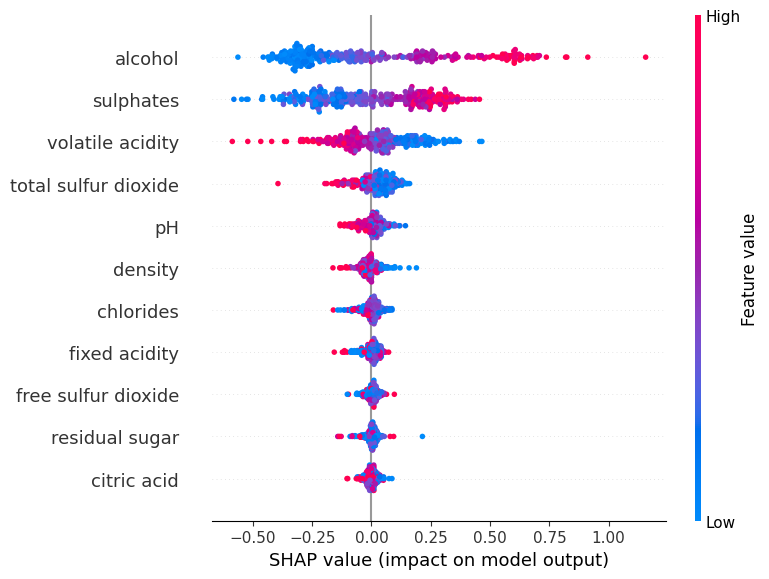

In [6]:
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


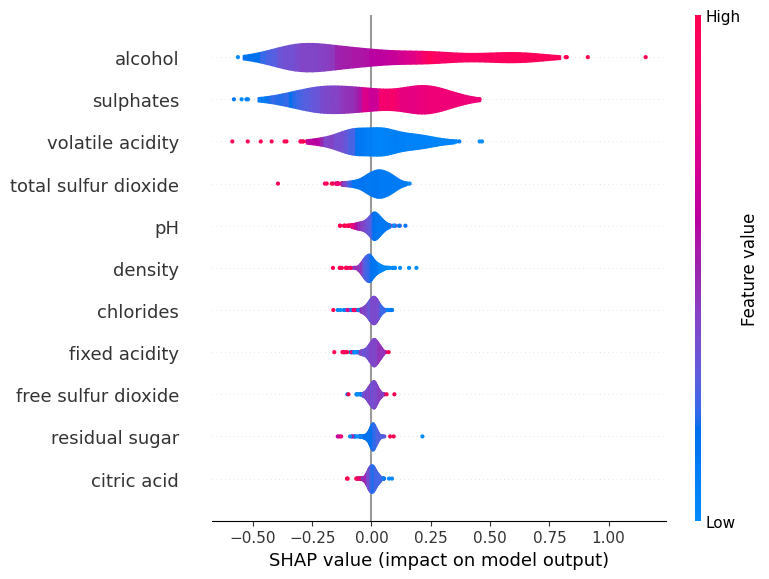

In [7]:
shap.summary_plot(shap_values, X_test, plot_type="violin")

## Individual predictions

In [8]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show] 

In [9]:
data_for_prediction

fixed acidity            7.10000
volatile acidity         0.27000
citric acid              0.60000
residual sugar           2.10000
chlorides                0.07400
free sulfur dioxide     17.00000
total sulfur dioxide    25.00000
density                  0.99814
pH                       3.38000
sulphates                0.72000
alcohol                 10.60000
Name: 1508, dtype: float64

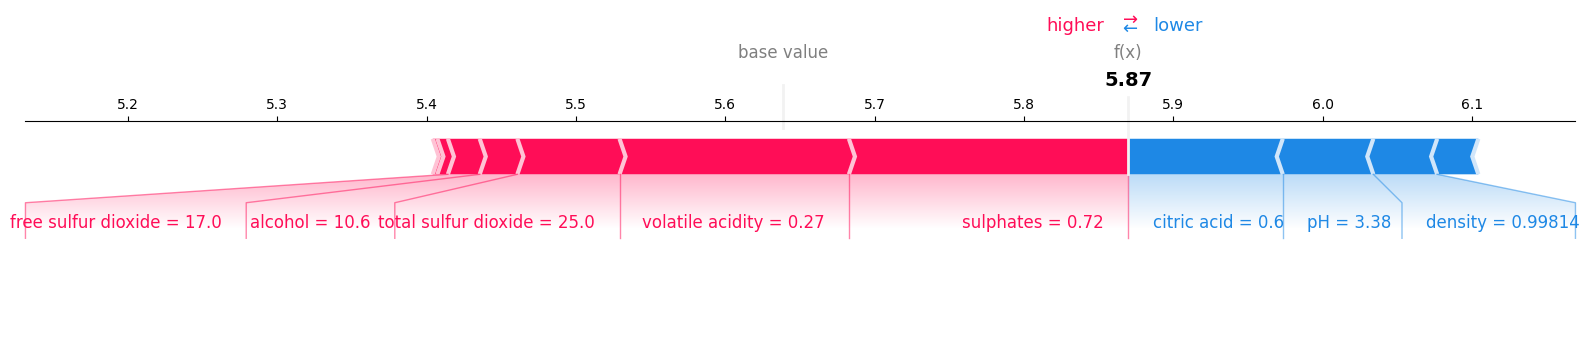

In [10]:
shap.force_plot(explainer.expected_value[0], shap_values[row_to_show], data_for_prediction, matplotlib=True)

In [11]:
print(f'calidad del vino en la fila {row_to_show}: {y_test.iloc[row_to_show]}')
print(f'predicción de la calidad del vino en la fila {row_to_show}: {y_pred[row_to_show]}')

calidad del vino en la fila 5: 6
predicción de la calidad del vino en la fila 5: 5.87


## Mejoras

In [12]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(
    dataset.drop(['quality', 'citric acid', 'residual sugar', 'free sulfur dioxide'], axis=1),
    dataset.quality,
    stratify=dataset.quality,
    test_size=0.2,
    random_state=42
)

new_model = RandomForestRegressor(n_estimators=100, random_state=42)
new_model.fit(new_X_train, new_y_train)

new_y_pred = new_model.predict(new_X_test)

In [22]:
print('MAE: ', round(mean_absolute_error(new_y_test, new_y_pred),3))
print('MSE: ', round(mean_squared_error(new_y_test, new_y_pred),3))

MAE:  0.427
MSE:  0.334


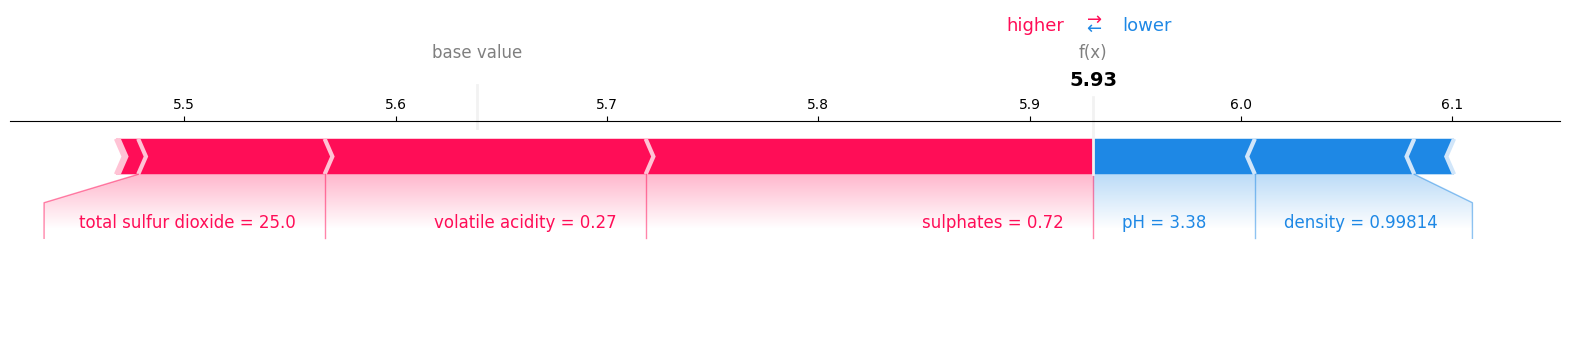

In [14]:
new_explainer = shap.TreeExplainer(new_model)
new_shap_values = new_explainer.shap_values(new_X_test)
data_for_prediction = new_X_test.iloc[row_to_show] 
shap.force_plot(new_explainer.expected_value[0], new_shap_values[row_to_show], data_for_prediction, matplotlib=True)

In [15]:
print(f'calidad del vino en la fila {row_to_show}: {new_y_test.iloc[row_to_show]}')
print(f'predicción de la calidad del vino en la fila {row_to_show}: {new_y_pred[row_to_show]}')

calidad del vino en la fila 5: 6
predicción de la calidad del vino en la fila 5: 5.93
